In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
data = "occupation_data.csv"


# Read the Data
data_df = pd.read_csv(data)
data_df.head()


# remove redundant columns 
data_df.drop(['group', 'AREA_TYPE','NAICS','NAICS_TITLE','NAICS_TITLE','OWN_CODE'], axis=1, inplace=True)
data_df.head()


,area_name,occ_code,occ_title,tot_emp,a_mean,Year
0,"Seattle-Bellevue-Everett, WA PMSA",11-0000,Management Occupations,75900,76940,1999
1,"Seattle-Bellevue-Everett, WA PMSA",13-0000,Business and Financial Operations Occupations,72680,52140,1999
2,"Seattle-Bellevue-Everett, WA PMSA",15-0000,Computer and Mathematical Occupations,66300,57190,1999
3,"Seattle-Bellevue-Everett, WA PMSA",17-0000,Architecture and Engineering Occupations,54930,59150,1999
4,"Seattle-Bellevue-Everett, WA PMSA",19-0000,"Life, Physical, and Social Science Occupations",17330,49190,1999


In [2]:
# rename columns 
renamed_df = data_df.rename(columns={"a_mean":"Mean_Annual_Salary",
                                     "tot_emp":"Total_Employees_Per_Category",
                                     "occ_title":"Occupation_Category_Name" , 
                                     "occ_code":"Occupation_Category_Code" ,
                                    "area_name":"Geographical_Area_Name" })
organized_df = renamed_df[[
                           "Occupation_Category_Code",
                           "Occupation_Category_Name",
                           "Year",
                           "Geographical_Area_Name",
                           "Total_Employees_Per_Category",
                            "Mean_Annual_Salary"
                            ]]
organized_df.head()



,Occupation_Category_Code,Occupation_Category_Name,Year,Geographical_Area_Name,Total_Employees_Per_Category,Mean_Annual_Salary
0,11-0000,Management Occupations,1999,"Seattle-Bellevue-Everett, WA PMSA",75900,76940
1,13-0000,Business and Financial Operations Occupations,1999,"Seattle-Bellevue-Everett, WA PMSA",72680,52140
2,15-0000,Computer and Mathematical Occupations,1999,"Seattle-Bellevue-Everett, WA PMSA",66300,57190
3,17-0000,Architecture and Engineering Occupations,1999,"Seattle-Bellevue-Everett, WA PMSA",54930,59150
4,19-0000,"Life, Physical, and Social Science Occupations",1999,"Seattle-Bellevue-Everett, WA PMSA",17330,49190


In [3]:
# Identify incomplete rows
organized_df.count()

Occupation_Category_Code        310
Occupation_Category_Name        310
Year                            310
Geographical_Area_Name          310
Total_Employees_Per_Category    310
Mean_Annual_Salary              310
dtype: int64

In [4]:
organized_df.dtypes

Occupation_Category_Code        object
Occupation_Category_Name        object
Year                             int64
Geographical_Area_Name          object
Total_Employees_Per_Category     int64
Mean_Annual_Salary               int64
dtype: object

In [5]:
organized_df.Year = organized_df.Year.astype(str)
organized_df.dtypes

Occupation_Category_Code        object
Occupation_Category_Name        object
Year                            object
Geographical_Area_Name          object
Total_Employees_Per_Category     int64
Mean_Annual_Salary               int64
dtype: object

In [6]:
organized_df.head()

,Occupation_Category_Code,Occupation_Category_Name,Year,Geographical_Area_Name,Total_Employees_Per_Category,Mean_Annual_Salary
0,11-0000,Management Occupations,1999,"Seattle-Bellevue-Everett, WA PMSA",75900,76940
1,13-0000,Business and Financial Operations Occupations,1999,"Seattle-Bellevue-Everett, WA PMSA",72680,52140
2,15-0000,Computer and Mathematical Occupations,1999,"Seattle-Bellevue-Everett, WA PMSA",66300,57190
3,17-0000,Architecture and Engineering Occupations,1999,"Seattle-Bellevue-Everett, WA PMSA",54930,59150
4,19-0000,"Life, Physical, and Social Science Occupations",1999,"Seattle-Bellevue-Everett, WA PMSA",17330,49190


In [7]:
organized_df['Occupation_Category_Code'].value_counts()

35-0000    14
15-0000    14
41-0000    14
13-0000    14
27-0000    14
17-0000    14
23-0000    14
19-0000    14
45-0000    14
51-0000    14
21-0000    14
49-0000    14
47-0000    14
31-0000    14
53-0000    14
25-0000    14
33-0000    14
43-0000    14
11-0000    14
29-0000    14
39-0000    14
37-0000    14
00-0000     2
Name: Occupation_Category_Code, dtype: int64

In [8]:
organized_df= organized_df[organized_df.Occupation_Category_Code != '00-0000']
organized_df['Occupation_Category_Code'].value_counts()

35-0000    14
47-0000    14
41-0000    14
13-0000    14
27-0000    14
17-0000    14
23-0000    14
19-0000    14
45-0000    14
51-0000    14
21-0000    14
15-0000    14
49-0000    14
31-0000    14
53-0000    14
25-0000    14
33-0000    14
43-0000    14
11-0000    14
29-0000    14
39-0000    14
37-0000    14
Name: Occupation_Category_Code, dtype: int64

In [9]:
organized_df['Geographical_Area_Name'].value_counts()

US                                                    154
Seattle-Bellevue-Everett, WA Metropolitan Division     88
Seattle-Bellevue-Everett, WA PMSA                      44
Seattle-Tacoma-Bellevue, WA                            22
Name: Geographical_Area_Name, dtype: int64

In [10]:
organized_df.loc[organized_df.Occupation_Category_Code == '15-0000',
                 'New_Occupation_Categories'] = 'Computer and Mathematical Sciense' 
organized_df.loc[organized_df.Occupation_Category_Code == '11-0000',
                 'New_Occupation_Categories'] = 'Management' 
organized_df.loc[organized_df.Occupation_Category_Code == '41-0000',
                 'New_Occupation_Categories'] = 'Sales' 
organized_df.loc[(organized_df.Occupation_Category_Code != '15-0000') & 
                 (organized_df.Occupation_Category_Code != '11-0000') & 
                 (organized_df.Occupation_Category_Code != '41-0000'),
                 'New_Occupation_Categories'] = 'Other Occupations'
organized_df.loc[organized_df.Geographical_Area_Name != 'US',
                 'Geographical_Area_Name'] = 'Seattle Metro' 

organized_df.head()

,Occupation_Category_Code,Occupation_Category_Name,Year,Geographical_Area_Name,Total_Employees_Per_Category,Mean_Annual_Salary,New_Occupation_Categories
0,11-0000,Management Occupations,1999,Seattle Metro,75900,76940,Management
1,13-0000,Business and Financial Operations Occupations,1999,Seattle Metro,72680,52140,Other Occupations
2,15-0000,Computer and Mathematical Occupations,1999,Seattle Metro,66300,57190,Computer and Mathematical Sciense
3,17-0000,Architecture and Engineering Occupations,1999,Seattle Metro,54930,59150,Other Occupations
4,19-0000,"Life, Physical, and Social Science Occupations",1999,Seattle Metro,17330,49190,Other Occupations


In [11]:
Seattle_1999 = organized_df.loc[(organized_df["Geographical_Area_Name"] == "Seattle Metro") & 
                                (organized_df["Year"] == "1999")]
Seattle_2017 = organized_df.loc[(organized_df["Geographical_Area_Name"] == "Seattle Metro") & 
                                (organized_df["Year"] == "2017")]
Us_National_1999 = organized_df.loc[(organized_df["Geographical_Area_Name"] == "US") & 
                                (organized_df["Year"] == "1999")]
Us_National_2017 = organized_df.loc[(organized_df["Geographical_Area_Name"] == "US") & 
                                (organized_df["Year"] == "2017")]


In [12]:
# Calculate Type Percents
Seattle_1999_grouped = Seattle_1999.groupby(['New_Occupation_Categories']).sum()

Seattle_2017_grouped = Seattle_2017.groupby(['New_Occupation_Categories']).sum()

Us_National_1999_grouped = Us_National_1999.groupby(['New_Occupation_Categories']).sum()

Us_National_2017_grouped = Us_National_2017.groupby(['New_Occupation_Categories']).sum()


In [13]:
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Computer","Management","Other Occupations", "Sales"]

# The values of each section of the pie chart
sizes_Seattle_1999 = Seattle_1999_grouped["Total_Employees_Per_Category"]

sizes_Seattle_2017 = Seattle_2017_grouped["Total_Employees_Per_Category"]

sizes_Us_National_1999 = Us_National_1999_grouped["Total_Employees_Per_Category"]

sizes_Us_National_2017 = Us_National_2017_grouped["Total_Employees_Per_Category"]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral" , "Green"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.2, 0, 0,0)



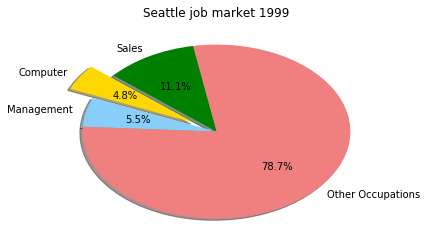

In [14]:
plt.pie(sizes_Seattle_1999, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Seattle job market 1999")
# Save Figure
plt.savefig("Seattle_1999.png")

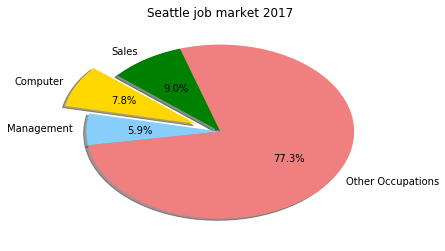

In [15]:
plt.pie(sizes_Seattle_2017, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Seattle job market 2017")
# Save Figure
plt.savefig("Seattle_2017.png")

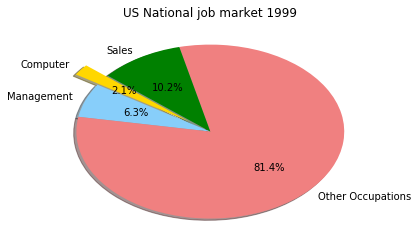

In [16]:
plt.pie(sizes_Us_National_1999, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("US National job market 1999")
# Save Figure
plt.savefig("US_National_1999.png")

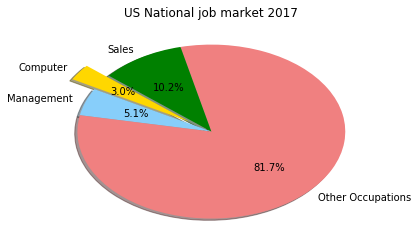

In [17]:
plt.pie(sizes_Us_National_2017, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("US National job market 2017")
# Save Figure
plt.savefig("US_National_2017.png")

In [18]:
organized_df.head()

,Occupation_Category_Code,Occupation_Category_Name,Year,Geographical_Area_Name,Total_Employees_Per_Category,Mean_Annual_Salary,New_Occupation_Categories
0,11-0000,Management Occupations,1999,Seattle Metro,75900,76940,Management
1,13-0000,Business and Financial Operations Occupations,1999,Seattle Metro,72680,52140,Other Occupations
2,15-0000,Computer and Mathematical Occupations,1999,Seattle Metro,66300,57190,Computer and Mathematical Sciense
3,17-0000,Architecture and Engineering Occupations,1999,Seattle Metro,54930,59150,Other Occupations
4,19-0000,"Life, Physical, and Social Science Occupations",1999,Seattle Metro,17330,49190,Other Occupations


In [19]:
organized_df['New_Occupation_Categories'].value_counts()

Other Occupations                    266
Management                            14
Sales                                 14
Computer and Mathematical Sciense     14
Name: New_Occupation_Categories, dtype: int64

In [20]:
Computer_Seattle = organized_df.loc[(organized_df["New_Occupation_Categories"] == "Computer and Mathematical Sciense")&
                                    (organized_df["Geographical_Area_Name"] == "Seattle Metro")].sort_values(["Year"])
Computer_Us_National = organized_df.loc[(organized_df["New_Occupation_Categories"] == "Computer and Mathematical Sciense")&
                                    (organized_df["Geographical_Area_Name"] == "US")].sort_values(["Year"])
Management_Seattle = organized_df.loc[(organized_df["New_Occupation_Categories"] == "Management")&
                             (organized_df["Geographical_Area_Name"] == "Seattle Metro")].sort_values(["Year"])
Management_Us_National = organized_df.loc[(organized_df["New_Occupation_Categories"] == "Management")&
                             (organized_df["Geographical_Area_Name"] == "US")].sort_values(["Year"])
Other_Seattle = organized_df.loc[(organized_df["New_Occupation_Categories"] == "Other Occupations")&
                         (organized_df["Geographical_Area_Name"] == "Seattle Metro")].sort_values(["Year"])
Other_Us_National = organized_df.loc[(organized_df["New_Occupation_Categories"] == "Other Occupations")&
                         (organized_df["Geographical_Area_Name"] == "US")].sort_values(["Year"])
Sales_Seattle = organized_df.loc[(organized_df["New_Occupation_Categories"] == "Sales")&
                        (organized_df["Geographical_Area_Name"] == "Seattle Metro")].sort_values(["Year"])
Sales_Us_National = organized_df.loc[(organized_df["New_Occupation_Categories"] == "Sales")&
                        (organized_df["Geographical_Area_Name"] == "US")].sort_values(["Year"])


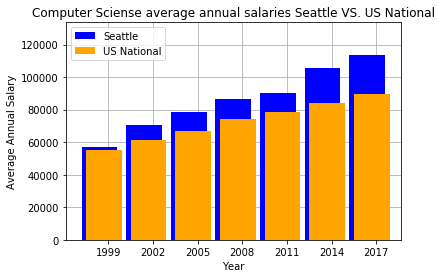

In [21]:
XComputer_Seattle = Computer_Seattle["Mean_Annual_Salary"]
XComputer_Us_National = Computer_Us_National["Mean_Annual_Salary"]
XManagement_Seattle = Management_Seattle["Mean_Annual_Salary"]
XManagement_Us_National = Management_Us_National["Mean_Annual_Salary"]
XOther_Seattle = Other_Seattle["Mean_Annual_Salary"]
XOther_Us_National = Other_Us_National["Mean_Annual_Salary"]
XSales_Seattle = Sales_Seattle["Mean_Annual_Salary"]
XSales_Us_National = Sales_Us_National["Mean_Annual_Salary"]

bar_w = 0.1
x_axis = np.arange(len(XComputer_Seattle))
plt.bar(x_axis, XComputer_Seattle , color='blue', zorder=2,label="Seattle")
plt.bar(x_axis+bar_w, XComputer_Us_National , color='orange',zorder=2, label="US National")
plt.xticks(x_axis+bar_w*2, Computer_Seattle["Year"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(XComputer_Seattle)+20000)
# Give our chart some labels and a tile
plt.title("Computer Sciense average annual salaries Seattle VS. US National")
plt.xlabel("Year")
plt.ylabel("Average Annual Salary")
plt.grid()
plt.legend(loc="upper left")
# Save Figure
plt.savefig("Computer.png")

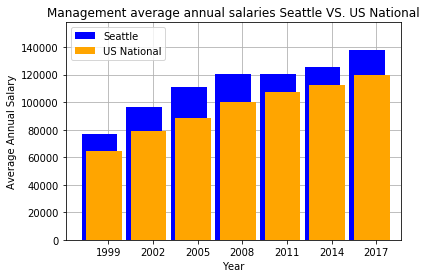

In [22]:
plt.bar(x_axis, XManagement_Seattle , color='blue', zorder=2,label="Seattle")
plt.bar(x_axis+bar_w, XManagement_Us_National , color='orange',zorder=2, label="US National")
plt.xticks(x_axis+bar_w*2, Computer_Seattle["Year"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(XManagement_Seattle)+20000)
# Give our chart some labels and a tile
plt.title("Management average annual salaries Seattle VS. US National")
plt.xlabel("Year")
plt.ylabel("Average Annual Salary")
plt.grid()
plt.legend(loc="upper left")
# Save Figure
plt.savefig("Management.png")

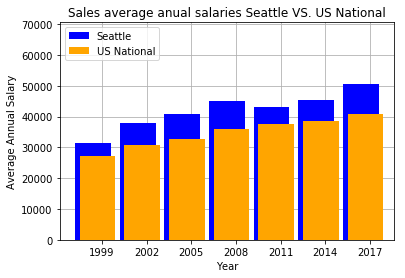

In [23]:
plt.bar(x_axis, XSales_Seattle , color='blue', zorder=2,label="Seattle")
plt.bar(x_axis+bar_w, XSales_Us_National , color='orange',zorder=2, label="US National")
plt.xticks(x_axis+bar_w*2, Computer_Seattle["Year"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(XSales_Seattle)+20000)
# Give our chart some labels and a tile
plt.title("Sales average anual salaries Seattle VS. US National")
plt.xlabel("Year")
plt.ylabel("Average Annual Salary")
plt.grid()
plt.legend(loc="upper left")
# Save Figure
plt.savefig("Sales.png")